<a href="https://colab.research.google.com/github/BeccaOY/friendly-waffle/blob/main/Grades_Dataset(Azure).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

--2021-10-26 20:16:02--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2021-10-26 20:16:02 (16.9 MB/s) - ‘grades.csv’ saved [322/322]



,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [2]:
# Get variable to examine, which is the grades
var = df_students['Grade']


mean = 49.18181818181818
Mode = 50
Median = 49.5
Min = 3.0
Max = 97.0


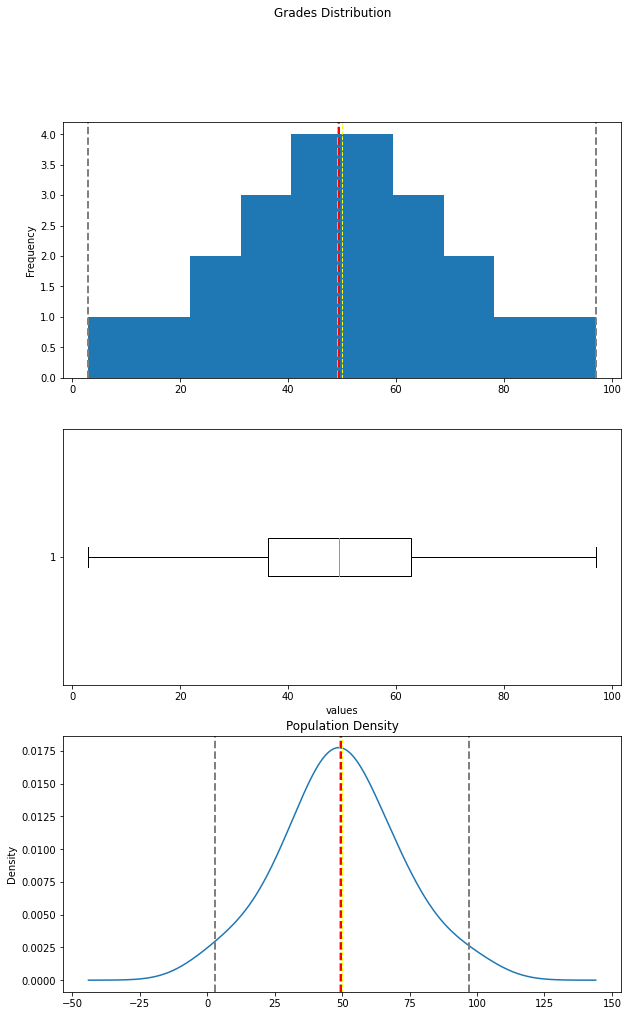

In [3]:
#create a function to create visualization
def show_distribution(var):
  from matplotlib import pyplot as plt
  #get statistics
  mean = var.mean()
  mode = var.mode()
  median = var.median()
  min = var.min()
  max = var.max()
  mode = int(mode)
  #print statistics
  print(f'mean = {mean}\nMode = {mode}\nMedian = {median}\nMin = {min}\nMax = {max}')

#create a figure with 2 subplots(10,4 and 2 rows, 1 column)
  fig, ax = plt.subplots(3,1, figsize = (10,16))
  #create histogram
  ax[0].hist(var)
  ax[0].set_ylabel('Frequency')
#create lines
  ax[0].axvline(x=min, color = 'gray', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mode, color = 'yellow', linestyle = 'dashed', linewidth = 1)
  ax[0].axvline(x=max, color = 'gray', linestyle='dashed', linewidth = 2)

#plot population density
  var.plot.density()
  #add title
  plt.title('Population Density')
  #add lines
  plt.axvline(x=min, color = 'gray', linestyle='dashed', linewidth = 2)
  plt.axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
  plt.axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)
  plt.axvline(x=mode, color = 'yellow', linestyle = 'dashed', linewidth = 1)
  plt.axvline(x=max, color = 'gray', linestyle='dashed', linewidth = 2)
  
  #create boxplot
  ax[1].boxplot(var, vert = False)
  ax[1].set_xlabel('values')

  #add title to distribution
  fig.suptitle('Grades Distribution')

  #show the figure
  fig.show()
#get the variable to display
grades = df_students['Grade']
#call the function
show_distribution(grades)


mean = 10.976190476190476
Mode = 9
Median = 10.0
Min = 6.0
Max = 16.0


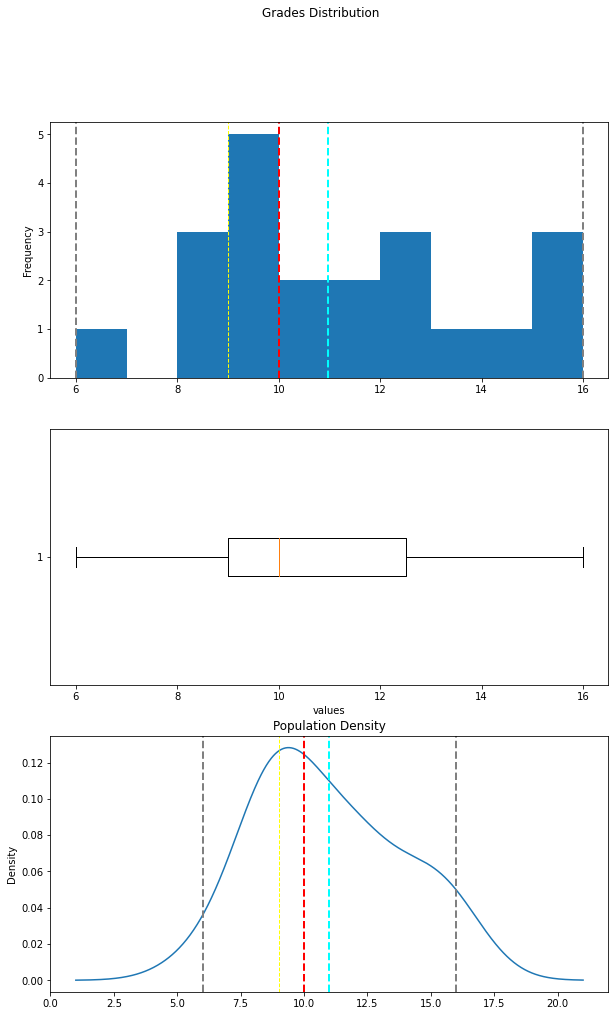

In [4]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

In [5]:
#Examine measures of variance
#range, standard deviation, variance
for column in ['Grade', 'StudyHours']:
  col = df_students[column]
#calculate range
  range = int(col.max() - col.min())
  standard_deviation = int(col.std())
  variance = int(col.var())
print (f'Range = {range}\n Standard Deviation = {standard_deviation}\n Variance = {variance}\n')

Range = 15
 Standard Deviation = 3
 Variance = 12



In [6]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In any normal distribution:
Approximately 68.26% of values fall within one standard deviation from the mean.
Approximately 95.45% of values fall within two standard deviations from the mean.
Approximately 99.73% of values fall within three standard deviations from the mean.
So, since we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal; we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


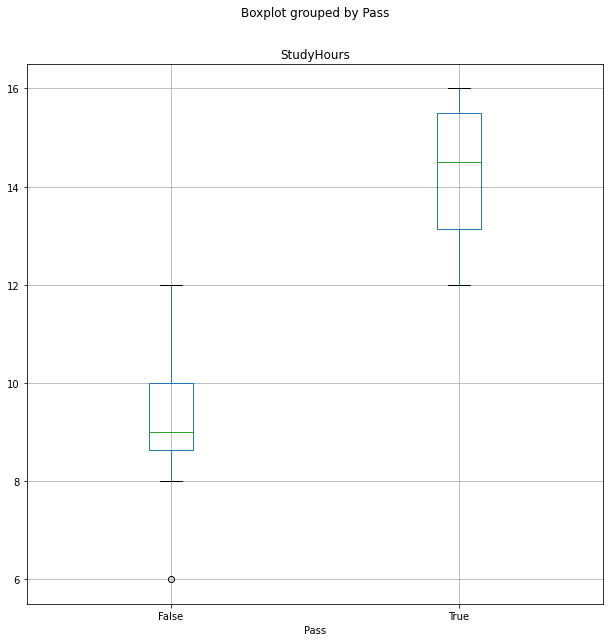

In [15]:
#finding correlation between categorical and continuous variables
#first remove outliers
df_noliers = df_students[df_students['StudyHours'] > 1]
#create a boxplot of both studyhours and pass or fail status
df_noliers.boxplot( 'StudyHours', by ='Pass', figsize= (10,10)
                                                        )

Comapring two
 numeric variables


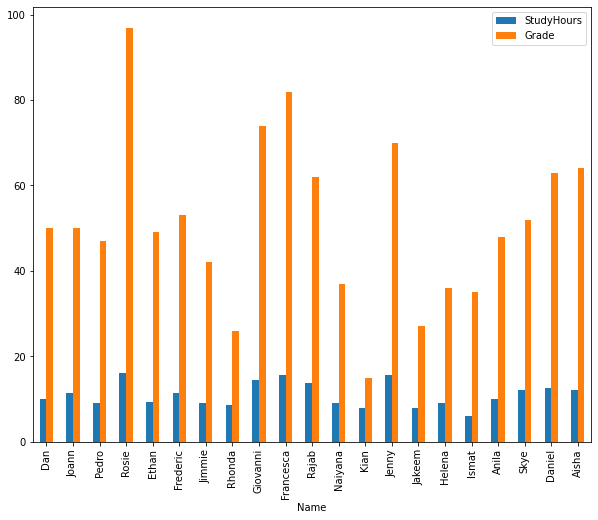

In [22]:
df_noliers.plot( x = "Name", y = ['StudyHours', 'Grade'], figsize = (10,8), kind = 'bar')

Grades are measured in grade points, and range from 3 to 97; while study time is measured in hours and ranges from 1 to 16.
To accomplish this, we'll use a technique called MinMax scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation; but the Scikit-Learn library provides a scaler to do it for you.


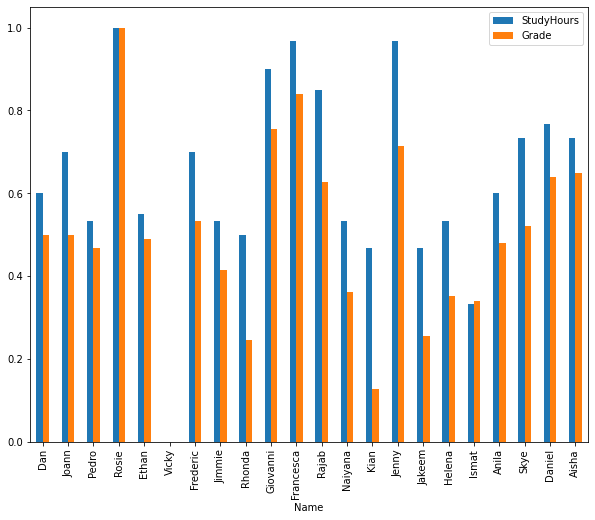

In [40]:
from sklearn.preprocessing import MinMaxScaler
#for simplicity
mmScaler = MinMaxScaler()
# Create a new df
df_studentsNew = df_students[['Grade', 'StudyHours', 'Name']].copy()
#scale the columns
df_studentsNew[['Grade', 'StudyHours']] = mmScaler.fit_transform( df_studentsNew[['Grade', 'StudyHours']])
#Create new barGraph
df_studentsNew.plot( x = "Name", y = ['StudyHours', 'Grade'], figsize = (10,8), kind = 'bar')                                                         

In [41]:
# See the apparent correlation
df_studentsNew.Grade.corr(df_studentsNew.StudyHours)

0.9254280509006746

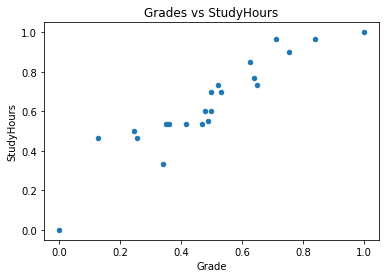

In [47]:
#Utilizing a scatter plot
df_studentsNew.plot.scatter( title = 'Grades vs StudyHours', x = 'Grade', y = 'StudyHours')

We can see this more clearly by adding a regression line (or a line of best fit) to the plot that shows the general trend in the data. To do this, we'll use a statistical technique called least squares regression.

**REGRESSION FOR PREDICTION**

In [50]:
 #Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70
